<h2 align="center">8_F</h2> 


### Importing the libraries

In [2]:
import numpy as np
import math as m
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

### creating dataset

In [3]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=15)

In [5]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train, test_size=0.25,random_state=15)

In [6]:
rbf=SVC(kernel="rbf",C=100,gamma=0.001)

In [7]:
rbf.fit(x_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
gamma=0.001

In [9]:
sup_vecs=rbf.support_vectors_
dual_coefs=rbf.dual_coef_
intercept=rbf.intercept_

In [10]:
def decision_function(x_cv,gamma):
    
    predict=[]
    decision=[]
    for xq in x_cv:
        dec_func = 0
        for j in range(len(sup_vecs)):
             norm2 = np.linalg.norm(sup_vecs[j, :] -xq)**2  # calculating the kernel(K(xi,xq)
             dec_func = dec_func + dual_coefs[0, j] * np.exp(-gamma*norm2) # calculating the sign
        dec_func += intercept
        decision.append(dec_func)
        if (dec_func)<0:                ##https://stackoverflow.com/questions/28503932/calculating-decision-function-of-svm-manually
            predict.append(0)
        else:
            predict.append(1)
    return np.array(decision)                     

In [11]:
f_cv=decision_function(x_cv,gamma) # calculating f_cv based on decision function

In [12]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(np.dot(x,w.T)+b))) #return 1/1+e(-x)

In [13]:
def logloss(w,x,y,b,reg=0):
    val=sigmoid(w,x,b)
    return -np.mean(y*np.log10(val)+(1-y)*np.log10(1-val))+reg  # cost function of logistic regression

In [14]:
count_one=list(y_cv).count(1)
count_zero=list(y_cv).count(0)      # calculating y+ and y_
y_plus=(count_one+1)/(count_one+2)
y_minize=1/(count_zero+2)

In [15]:
def update(y_cv,y_plus,y_minize):
    u_cv=[]
    for point in y_cv:    # update function convert y_cv into y+,y_
        if point==1:
                u_cv.append(y_plus)
        else:
              u_cv.append(y_minize)
    return(np.array(u_cv))              

In [16]:
y_cv=update(y_cv,y_plus,y_minize)

In [17]:
w = np.zeros_like(f_cv[0])# initial weight vector
b = 0      # initial intercept value
eta0  = 0.0001  # learning rate
alpha = 0.0001 # lambda value
N = len(f_cv)
print(len(y_cv))
print(N)

1000
1000


In [18]:
ini=logloss(w,f_cv,y_cv,b)
print("Initial log loss =",ini)

Initial log loss = 0.3010299956639812


#### SGD alorithm for calculating optimal w and b

In [21]:
def sgd_algo(f_cv,y_cv,eta0,alpha,w,b,epoch):
    t=0.001 # tolerence
    test_loss=[]
    epoc=[]
    for i in  range(0,epoch): 
        epoc.append(i)
        for j in range(0,N):
            reg=alpha/2*np.dot(w.T,w) #regulrization term
            w = ((1-eta0*(alpha/N))*w)+((eta0*f_cv[j])*(y_cv[j]-sigmoid(w,f_cv[j],b))) # updating weight vector
            b = b+(eta0*(y_cv[j]-sigmoid(w,f_cv[j],b)))       # updatind intercept    
        test=logloss(w,f_cv,y_cv,b,reg)
        test_loss.append(test)
        if i<=t :
            continue                                                                  
            if abs(test_loss[i]-test_loss[i-1])>t: # block to check convergence 
                continue
            else:
                break 
    return w,b,epoc,test_loss

In [22]:
epoch=45
we,be,epo,loss=sgd_algo(f_cv,y_cv,eta0, alpha,w,b,epoch)
print("optimal weight = ",we)
print("optimal intercept = ",be)


optimal weight =  [1.14038548]
optimal intercept =  -0.16232803221227102


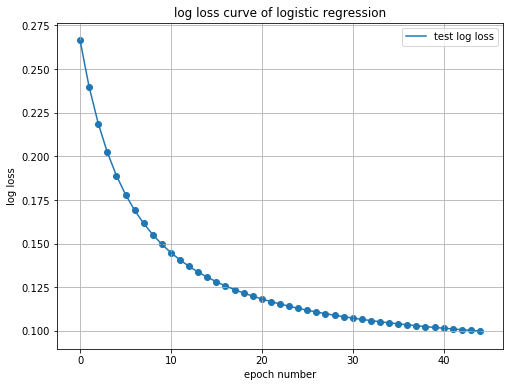

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epo,loss, label='test log loss')
plt.scatter(epo,loss)
plt.title('log loss curve of logistic regression')
plt.xlabel('epoch number')
plt.ylabel("log loss")
plt.legend()

In [21]:
ftest=decision_function(x_test,gamma)

In [22]:
def probability(ftest,w,b):
    p=1/(1+np.exp(-w*ftest+b)) # to calculate probilty P(Y=1|X)
    return p

In [23]:
prob=probability(ftest,we,be)
print(prob[:10])

[[0.23774793]
 [0.91674083]
 [0.26904252]
 [0.67529715]
 [0.00228871]
 [0.92508048]
 [0.18246605]
 [0.90426885]
 [0.18869581]
 [0.88038215]]
